<h1><center>Effort Estimation</center></h1>

# Table of Contents

**[Business Understanding](#1)**
   - [Business Objective](#1.1)
   - [Current Solution & Alternatives](#1.2)
   - [Proposed Solution](#1.3)
   
**[Data Understanding & Cleaning](#2)**
  - [Import Libraries & Configure Notebook](#2.1)
  - [Import & Review Data](#2.2)
  - [Filter Out High Value Customer](#2.3)
  - [Label Churned Customers](#2.4)
  - [Delete Churned Phase data](#2.5)
  - [Columns With One Value Only](#2.6)
  - [Columns With Many Null values](#2.7)
  - [Columns With Mostly Zeroes](#2.8)
  - [Delete Unnecessary Columns](#2.9) 
  
**[Data Analysis & Preparation](#3)**
  - [Time Gap Between Recharges](#3.1)
  - [Attribute Relationships & Collinearity Analysis](#3.2) 
  - [Outliers](#3.3)
  - [Analyze Target Variable](#3.4)
  - [Bivariate Analysis](#3.5)
  - [Train-Test Split](#3.6)
  - [Rescale Variables](#3.7)
  - [Class Imbalance](#3.8)

  
**[Model Building & Evaluation](#4)**
   - [Logistic Regression Models](#4.1)
      - [Class Balancing & Baseline Model](#4.1.1)
      - [Optimum Probability Threshold](#4.1.1)
      - [Dimensionality Reduction with PCA](#4.1.2)
      - [Hyperparameter tuning](#4.1.3)
      - [Generalized Regression using Polynomial Features](#4.1.4)
      
   - [Decision Tree Models](#4.2)
      - [DT - Basic Model](#4.2.1)
      - [DT - Hyperparameter Tuning ](#4.2.2)
      - [Random Forests - Basic Model](#4.2.3)
      - [Random Forests - Hyperparameter Tuning](#4.2.4)
      
   - [Support Vector Machine Models](#4.3)
      - [Basic Model](#4.3.1)
      - [Hyperparameter Tuning](#4.3.2)
      
   - [XGBoost Models](#4.4)
      - [Basic Model](#4.4.1)
      - [Hyperparameter Tuning](#4.4.2)
      
   - [Model for Drivers Analysis](#4.5)
   - [Conclusion on Modelling](#4.6)

**[Business Presentation](#5)**
   - [Drivers of Churn](#5.1)
   - [Recommendations](#5.2)
 
**[References](#6)**



<a id="1"></a>
# Business Understanding

<a id="1.1"></a>
## Business Objective

- Estimation process slows down sales cycle.
- X% of projects are going over budget and overall we've lost Y% across these regions. The goal is to get as close as possible to project estimation. 

The current solution and alternatives are all too likely to be unsuccessful as they are dependent on individual skill and perception and do not give us a generalized enough model to arrive at estimates. 


<a id="1.2"></a>
## Current Solution & Alternatives

The Bold360 PS team estimates its projects using the following techniques:

- Refer to similar projects (Analogous Estimation)
- Ask somebody (Expert Judgement)
- Ball-park high-level tasks (Top-down Estimation)


Alternative Approaches:

- Bottom-up: Not feasible because we don't have the opportunity to get all minute details up front
- PERT/3-point estimate: Feasible and can improve estimates but relies on expertise & requires bandwidth
- Parametric estimate: Feasible but what how accurate will those weights be and how do we factor in non-tangibles or non-activities such as partner involvement?

Summary:
We need a solution that factors in non-activities and one that dynamically improves over time.

<a id="1.3"></a>
## Proposed Solution

The solution I am proposing is similar to **parametric estimation** but uses regression or decision tree statistical modelling to be precise. The upside is that we can build a model that has learnt past experiences whereas the downside is that it does not account for the human element - local culture, individual ability etc. However, these downsides are applicable to current solutions as well. 

Another possible limitation of the solution could be **contingency planning will be missing** because contingencies are for unknowns whereas modelling expects known inputs.

<a id="1.1"></a>
## Ideas

- If something like SFDC connector is an exception then hard-code its weights and keep it out of the model.
- Capture estimated hours as well to get a sense of which kind of projects we're not good at estimating accurately with our current approach
- Analyze the common variables in projects that have overages so we identify what we're bad at doing
- Do error analysis as explained by Andrew Ng to maximize accuracy. 
- Try creating a joint probability distribution as a model. I realize this will be impractical for numerical inputs or ouputs so everything will have to be represented as categorical
- Capture the end date of the project and build a time series/trend on where we're spending our time, or how project sizes have grown etc. Something that helps us get insight into what's changed in the past year.
- Build interpretability into the outcome i.e. not only should the model predict the effort but explain why it thinks so. This will allow me to explore both causality and model interpretability

<a id="1.1"></a>
## Limitations / Challenges

- **Data Reliance**: People may not have logged their time diligently.
- **Interpretability**: Essentially this is a robust analogous estimation tool so its basis for estimation is "we're estimating this much because that's how much past projects have cost us"
- **Usage**: Possible consdider these estimates as the 'minimum' estimate and add anything more as needed.
- **Limitations**: If the scoping requirements include features that are not asked by the model (you'll know when you don't see a relevant question in the estimator tool) then that has to be estimated manually. 
- **Model improvement**: The business circumstances that resulted in these estimates will change - PS will deliver providers in lesser time, new talent may join the team, there will be a shift from providers to entities, project governance will tighten up and so on. So I will revisit the model say every 6-months. This is no different from our current estimation that evolves as we learn from projects. **Build a diagram** for this. 
- **Out of scope**: Following kinds of projects are out of scope for the estimator: 1. Consulting only engagements - training, partner enablement, SDK, API consultin 2. Enhancement or phase 2 projects - only the initial project will be estimated because that's where estimation is an issue

**Next Steps**
- Share with Alyssa, Court & Alyysa

Raw Data Stats (prior to import)
- 409 archived projects - alltime
- 137 achived projects - 2019 to 13-july-2020

**Potential Findings/Hypothesis**
- Larger teams => Overages. Reorganize into pods and assign projects to pods only
- Large % of people report under reporting => Reasons could be misunderstanding of billables, fear of going over budget

<a id="2"></a>
# Data Understanding & Cleaning

The dataset is from Harvest

<a id="2.1"></a>
## Import Libraries & Configure Notebook

In [93]:
#Core libraries
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#Modelling
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import RFE
# from statsmodels.stats.outliers_influence import variance_inflation_factor #For multicollinearity
from sklearn.decomposition import PCA, IncrementalPCA
# import xgboost as xgb
from xgboost import XGBClassifier
# from xgboost import plot_importance
import statsmodels.api as sm #For linear regression modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor #For multicollinearity
from sklearn.feature_selection import RFE

#Model selection and evaluation tools
# from sklearn.metrics import auc, roc_auc_score,roc_curve,f1_score,precision_recall_curve,classification_report, confusion_matrix,accuracy_score
# from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#model serialization
from sklearn.externals import joblib


In [94]:
#Configure notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set Parameters for Displaying data
pd.options.display.max_info_columns = 300
pd.set_option('display.max_columns', 120)
pd.options.display.max_rows = 300

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

# #InteractiveShell.ast_node_interactivity = "all"
sns.set_style("whitegrid")
%matplotlib inline


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

<a id="2.1"></a>
## Import Data

In [95]:
data = pd.read_excel('../data/Cost_Drivers2_processing.xlsx')

In [96]:
data.shape

(63, 72)

In [97]:
data.head(3)

,project_name,submitter,is_completed,customer_loc,is_existing_customer,is_partner,is_beauracratic,is_change_req,has_skills,has_delays,has_many_mtgs,is_infosec_review,use_case,purpose,is_rip_replace,is_boldai,is_acquire,is_advise,is_agent,is_rescue,prod_bugs,sc_ct,embedded_widget_ct,search_widget_ct,ai_conv_widget_ct,agent_widget_ct,is_sdk_consulting,is_fb_ai,is_whatsapp,is_wechat,is_teams,is_advise_chrome_ext,is_advise_sfdc_widget,sc_complexity,branding_complexity,frontend_js_complexity,is_analytics_integration,is_data_masking,is_tag_manager,is_accessibility,is_conversion_tracking,is_snow_kb_sync,is_sfdc_connector,is_3rdparty_livechat,is_diy,is_custom_report_dashboard,crm_ticketing_name,complex_providers_ct,simple_providers_ct,entities_ct,is_middleware_dev,is_api_consulting,is_sso,is_rescue_recording,kb_ct,is_content_available,content_import,is_uses_context,is_geoflent,language_kb_ct,chat_agents_ct,is_email_channel,is_sms_channel,is_fb_channel,budget,actual_hrs,deduct_hrs,add_hrs,net_hrs,qa_evy_hrs,team_ct,overage_reason
0,FEB19 Cognzt-Aker/Bold360ai/Deployment/120hrs/...,Kashif,1,India,0,1,1,0,1,1,1,0,Internal,Support,0,1,0,0,1,0,Significant,0,0,0,4,0,0,0,0,0,0,0,0,None,Simple,Complex,0,0,0,0,0,0,0,0,0,0,SNOW,1,0,0,0,1,0,0,1,0,None,0,0,0,10,0,0,0,120.0000,225.0000,40,0,185.0000,0,3,"CR, Bugs, Skill Gap"
1,MAR19 Orkla/Bold360ai/Deployment/100hrs/KSami_...,Kashif,1,India,0,1,1,0,1,1,0,0,Internal,Support,0,1,0,0,1,0,None,0,0,0,1,0,0,0,0,0,0,0,0,None,Simple,Complex,0,0,0,0,0,0,0,0,0,0,SNOW,3,0,0,0,1,0,0,1,0,None,0,0,0,2,0,0,0,100.0000,199.0000,33,0,166.0000,0,3,CR
2,JUN19 Grundfos/Bold360/15hrs/Kapil_Kashif,Kashif,1,APAC,0,0,0,0,0,0,0,0,External,Support,0,0,0,0,1,0,None,0,0,0,0,3,0,0,0,0,0,0,0,None,Complex,None,0,0,1,0,0,0,0,0,0,0,None,0,0,0,0,1,0,0,0,0,None,0,0,0,2,0,0,0,15.0000,19.0000,2,0,19.0000,0,2,"Underestimated, Skip Gap"


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   project_name                63 non-null     object 
 1   submitter                   63 non-null     object 
 2   is_completed                63 non-null     int64  
 3   customer_loc                63 non-null     object 
 4   is_existing_customer        63 non-null     int64  
 5   is_partner                  63 non-null     int64  
 6   is_beauracratic             63 non-null     int64  
 7   is_change_req               63 non-null     int64  
 8   has_skills                  63 non-null     int64  
 9   has_delays                  63 non-null     int64  
 10  has_many_mtgs               63 non-null     int64  
 11  is_infosec_review           63 non-null     int64  
 12  use_case                    63 non-null     object 
 13  purpose                     63 non-nu

## Clean up string

In [99]:
#remove space
data = data.apply(lambda x:x.str.strip() if x.dtype=='object' else x)

#to lower case
data = data.apply(lambda x:x.str.lower() if x.dtype=='object' else x)

## Set Index

In [100]:
data = data.set_index('project_name')

## Unique values

In [101]:
data.nunique().sort_values()

is_analytics_integration       1
is_fb_ai                       1
is_whatsapp                    1
is_wechat                      1
is_teams                       1
is_advise                      1
is_acquire                     1
is_advise_chrome_ext           1
is_advise_sfdc_widget          1
is_sms_channel                 1
is_custom_report_dashboard     1
is_conversion_tracking         1
is_fb_channel                  1
is_api_consulting              2
is_sdk_consulting              2
is_sso                         2
is_data_masking                2
is_tag_manager                 2
is_accessibility               2
is_snow_kb_sync                2
is_sfdc_connector              2
is_middleware_dev              2
is_rescue_recording            2
is_diy                         2
search_widget_ct               2
is_completed                   2
is_existing_customer           2
is_partner                     2
is_beauracratic                2
is_change_req                  2
has_skills

>Observations: 
- None of the projects in the sample set implemented Advise (SFDC/Chrome widget), SMS for Bold Agent, FB for AI&Agent, Whatsapp, WeChat, Teams, Customer reports/dashboard and Analytics integration
- I am dropping SMS/FB/WA/WeChat/Teams but we do have some project(s) with email so maybe that can act as a representation of a channel but I am not sure because email is a different ballgame from other 'chat' channels.

In [102]:
data = data.drop(['is_analytics_integration','is_sms_channel', 'is_custom_report_dashboard', 'is_advise', 'is_advise_sfdc_widget', 'is_advise', 'is_fb_ai', 'is_whatsapp', 'is_wechat', 'is_teams', 'is_advise_chrome_ext','is_custom_report_dashboard', 'is_sms_channel','is_fb_channel'],axis=1)

In [103]:
data.nunique().sort_values()

is_conversion_tracking     1
is_acquire                 1
is_tag_manager             2
is_accessibility           2
is_sfdc_connector          2
is_data_masking            2
is_3rdparty_livechat       2
is_diy                     2
is_middleware_dev          2
is_sdk_consulting          2
is_api_consulting          2
is_sso                     2
search_widget_ct           2
is_rescue_recording        2
is_content_available       2
is_rescue                  2
is_agent                   2
is_rip_replace             2
is_uses_context            2
is_geoflent                2
is_infosec_review          2
has_many_mtgs              2
has_delays                 2
has_skills                 2
is_change_req              2
is_beauracratic            2
is_partner                 2
is_existing_customer       2
is_email_channel           2
is_completed               2
is_boldai                  2
is_snow_kb_sync            2
content_import             3
branding_complexity        3
frontend_js_co

## Null values

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, feb19 cognzt-aker/bold360ai/deployment/120hrs/ksami_asiwek to city of mesa - conversational bot with escalation to live agent
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   submitter               63 non-null     object 
 1   is_completed            63 non-null     int64  
 2   customer_loc            63 non-null     object 
 3   is_existing_customer    63 non-null     int64  
 4   is_partner              63 non-null     int64  
 5   is_beauracratic         63 non-null     int64  
 6   is_change_req           63 non-null     int64  
 7   has_skills              63 non-null     int64  
 8   has_delays              63 non-null     int64  
 9   has_many_mtgs           63 non-null     int64  
 10  is_infosec_review       63 non-null     int64  
 11  use_case                63 non-null     object 
 12  purpose                 63 non-null  

In [105]:
data['is_rescue'].unique()

array([0, 1], dtype=int64)

In [106]:
data.isnull().sum().sort_values(ascending=False)

overage_reason            40
team_ct                    0
frontend_js_complexity     0
branding_complexity        0
sc_complexity              0
is_sdk_consulting          0
agent_widget_ct            0
ai_conv_widget_ct          0
search_widget_ct           0
embedded_widget_ct         0
sc_ct                      0
prod_bugs                  0
is_rescue                  0
is_agent                   0
is_acquire                 0
is_boldai                  0
is_rip_replace             0
purpose                    0
use_case                   0
is_infosec_review          0
has_many_mtgs              0
has_delays                 0
has_skills                 0
is_change_req              0
is_beauracratic            0
is_partner                 0
is_existing_customer       0
customer_loc               0
is_completed               0
is_data_masking            0
is_tag_manager             0
is_accessibility           0
is_content_available       0
qa_evy_hrs                 0
net_hrs       

>**Observation**:
- Currently, some projects have missing agent count and I have to chase Pablo, Yash and Mohan for this. 
- Actual and net hours of 4 of Yash's projects are suppose to be empty because they are not completed/archived yet but the data is **temporarily set** to be same as the budget
- Overage reason is empty even for projects that went over budget. It is not a good use of my time to chase people for it; I'd rather build a classification mode for overage/no overage and find the top correlations. Also, going by the inputs in the Excel sheet, I don't see a pattern. Morever, there is bias because for instance Pablo says that Blue Shield was underestimated/underscoped but in reality there was a lot of CR during the project that wasn't called out.

**Temporary fix for agent count**

In [107]:
data['chat_agents_ct'].fillna(10,inplace=True)
data['chat_agents_ct'] = data['chat_agents_ct'].astype(int)

## Too many zeroes

In [108]:
data.astype(bool).sum(axis=0).sort_values(ascending=True)

is_conversion_tracking     0
is_acquire                 0
is_tag_manager             1
is_sdk_consulting          1
search_widget_ct           1
is_rescue_recording        2
is_sfdc_connector          2
is_3rdparty_livechat       2
is_geoflent                3
is_rescue                  3
is_snow_kb_sync            4
is_data_masking            4
is_accessibility           4
deduct_hrs                 6
qa_evy_hrs                 6
embedded_widget_ct         6
is_partner                 7
simple_providers_ct        8
add_hrs                    8
is_middleware_dev          8
language_kb_ct            11
is_api_consulting         11
complex_providers_ct      12
is_infosec_review         12
is_diy                    12
is_sso                    12
entities_ct               13
sc_ct                     13
is_existing_customer      16
is_rip_replace            17
is_uses_context           19
is_email_channel          21
has_many_mtgs             24
has_delays                25
has_skills    

>**Observations**:
- Dropping rare project scope elements is risky in that we don't know if they matter enough to be accounted for and if they do, by dropping them we're not accounting for their affect. This will mean too many exceptions which need rule-based addition of hours to the estimator's prediction.
- I am **dropping Rescue but later I need to adjust the "net hours" of projects that have Rescue** by discounting say 30-40 hours. 
- Let's also drop the Acquire project as that's rare

In [109]:
#shape before deletion
data.shape

(63, 60)

In [110]:
#Drop Acquire project
data = data.drop(data[data.is_acquire==1].index)

In [111]:
#Drop cols with little variance
data = data.drop(['is_tag_manager','is_conversion_tracking','is_sdk_consulting', 'search_widget_ct','is_acquire','is_rescue_recording','is_sfdc_connector','is_3rdparty_livechat','is_rescue','is_geoflent', 'is_accessibility','is_snow_kb_sync','is_data_masking'],axis=1)

In [112]:
#shape after deletion
data.shape

(63, 47)

## Remove incomplete projects??

Consider this for later

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, feb19 cognzt-aker/bold360ai/deployment/120hrs/ksami_asiwek to city of mesa - conversational bot with escalation to live agent
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   submitter               63 non-null     object 
 1   is_completed            63 non-null     int64  
 2   customer_loc            63 non-null     object 
 3   is_existing_customer    63 non-null     int64  
 4   is_partner              63 non-null     int64  
 5   is_beauracratic         63 non-null     int64  
 6   is_change_req           63 non-null     int64  
 7   has_skills              63 non-null     int64  
 8   has_delays              63 non-null     int64  
 9   has_many_mtgs           63 non-null     int64  
 10  is_infosec_review       63 non-null     int64  
 11  use_case                63 non-null     object 
 12  purpose                 63 non-null  

## Prepare Data

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, feb19 cognzt-aker/bold360ai/deployment/120hrs/ksami_asiwek to city of mesa - conversational bot with escalation to live agent
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   submitter               63 non-null     object 
 1   is_completed            63 non-null     int64  
 2   customer_loc            63 non-null     object 
 3   is_existing_customer    63 non-null     int64  
 4   is_partner              63 non-null     int64  
 5   is_beauracratic         63 non-null     int64  
 6   is_change_req           63 non-null     int64  
 7   has_skills              63 non-null     int64  
 8   has_delays              63 non-null     int64  
 9   has_many_mtgs           63 non-null     int64  
 10  is_infosec_review       63 non-null     int64  
 11  use_case                63 non-null     object 
 12  purpose                 63 non-null  

In [115]:
#one-hot encoding
data = pd.get_dummies(data=data,columns=['use_case','purpose','prod_bugs','sc_complexity','branding_complexity','frontend_js_complexity','content_import'],drop_first=True)
# data = data.drop(['use_case','purpose','prod_bugs','sc_complexity','branding_complexity','frontend_js_complexity','content_import'],axis=1)

## Overage and under-reporting analysis

Let's do some analysis of net hours vs actual hours before we get into the label

In [116]:
#no. of projects with no under/over reporting
data[data['net_hrs']==data['actual_hrs']].shape

#no. of projects with under reporting
data[data['net_hrs']>data['actual_hrs']].shape

#no. of projects with over reporting
data[data['net_hrs']<data['actual_hrs']].shape

(29, 54)

(21, 54)

(13, 54)

In [117]:
#df for projects that were under_reported
under_reported_projects = data[data['net_hrs']>data['actual_hrs']]

#how many hours did we under-report
under_reported_projects.net_hrs.sum()-under_reported_projects.actual_hrs.sum()

#by what percentage we are under-reporting 
100*(under_reported_projects.net_hrs.sum()-under_reported_projects.actual_hrs.sum())/under_reported_projects.actual_hrs.sum()

#how many people declared under-reported vs number of people I've surveyed
data['submitter'].nunique()
under_reported_projects['submitter'].nunique()

415.25

11.764289255613004

12

7

In [118]:
# #how much under reporting is happening - ones that went over and ones that didn't?
# data['under_reported_hrs'] = np.where(data['net_hrs']>data['actual_hrs'],100*(data['net_hrs']- data['actual_hrs'])/data['actual_hrs'],0)
# data['under_reported_hrs'] = data['under_reported'][data['under_reported']!=0]

In [119]:
#calculate overage and add label  basis net hours
data['overage_hrs'] = data['net_hrs']-data['budget'] 
data['is_overage'] = data['overage_hrs'].apply(lambda x:1 if x>=1 else 0) 

#calculate overage and add label  basis actual harvest hrs
data['overage_hrs2'] = data['actual_hrs']-data['budget'] 
data['is_overage2'] = data['overage_hrs2'].apply(lambda x:1 if x>=1 else 0) 

In [120]:
#how many projects have overages defined basis either net hours and actual hours?
data['is_overage'].sum()
data['is_overage2'].sum()

31

31

In [121]:
# #how much under reporting is happening specifically on projects that went over?
# #note: under reporting happens in projects without overages as well
# data['under_reported'] = np.where(data.is_overage2==1,100*(data['net_hrs']- data['actual_hrs'])/data['actual_hrs'],0)
# data['under_reported'] = data['under_reported'][data['under_reported']!=0]

In [122]:
#overaged projects that were significantly under reported
# data[data['under_reported']>=13]

>**Observations**:
- 35% (1 in 3) of projects had under reported hours (these projects may or may not have gone over budget). This data is not so relevant because there are are several other non-phase 1 projects which I don't have in my sample. The next figure below is more important. 
- 2 of 3 (8 of 12) engineers declared under-reporting hours
- Hours are under-reported by ~12% i.e. if the hours reported are 100 in harvest, in reality they may be 112 hours. Now, this is for **known** underreporting so we are not accounting for a) people who didn't declare under-reporting b) other project team members who I did not ask. So 12% is a minimum, and in reality it could be 25%. This affects productivity and billing. 
- Specifically on projects that went over budget have on average 8% under reporting. That's lost billing opportunity.
- 50% (32 of 64) projects in the sample went over budget!

## Remove Unwanted Cols

Remove columns that are not useful for "modelling". These may still be useful for other analysis.

In [123]:
data = data.drop(['submitter','overage_hrs','is_overage','overage_hrs2','is_overage2','budget','actual_hrs','deduct_hrs','add_hrs','overage_reason', 'crm_ticketing_name','customer_loc', 'is_completed'],axis=1)

## Analyze data distribution

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, feb19 cognzt-aker/bold360ai/deployment/120hrs/ksami_asiwek to city of mesa - conversational bot with escalation to live agent
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_existing_customer            63 non-null     int64  
 1   is_partner                      63 non-null     int64  
 2   is_beauracratic                 63 non-null     int64  
 3   is_change_req                   63 non-null     int64  
 4   has_skills                      63 non-null     int64  
 5   has_delays                      63 non-null     int64  
 6   has_many_mtgs                   63 non-null     int64  
 7   is_infosec_review               63 non-null     int64  
 8   is_rip_replace                  63 non-null     int64  
 9   is_boldai                       63 non-null     int64  
 10  is_agent                        63 non-null    

In [125]:
data.describe()

,is_existing_customer,is_partner,is_beauracratic,is_change_req,has_skills,has_delays,has_many_mtgs,is_infosec_review,is_rip_replace,is_boldai,is_agent,sc_ct,embedded_widget_ct,ai_conv_widget_ct,agent_widget_ct,is_diy,complex_providers_ct,simple_providers_ct,entities_ct,is_middleware_dev,is_api_consulting,is_sso,kb_ct,is_content_available,is_uses_context,language_kb_ct,chat_agents_ct,is_email_channel,net_hrs,qa_evy_hrs,team_ct,use_case_external,use_case_internal,purpose_sales,purpose_support,prod_bugs_none,prod_bugs_significant,sc_complexity_none,sc_complexity_standard,branding_complexity_none,branding_complexity_simple,frontend_js_complexity_none,frontend_js_complexity_simple,content_import_none,content_import_straightforward
count,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000,63.0000
mean,0.2540,0.1111,0.4127,0.4127,0.4127,0.3968,0.3810,0.1905,0.2698,0.8095,0.7937,0.2857,0.1111,0.9683,1.2857,0.1905,0.6667,0.8571,0.5556,0.1270,0.1746,0.1905,1.3651,0.5873,0.3016,0.4603,27.7778,0.3333,133.2103,2.3810,2.2381,0.6349,0.2540,0.1270,0.5714,0.5556,0.2540,0.7937,0.1270,0.1905,0.4286,0.2063,0.2540,0.3333,0.6032
std,0.4388,0.3168,0.4963,0.4963,0.4963,0.4932,0.4895,0.3958,0.4474,0.3958,0.4079,0.6332,0.3642,1.1909,2.0035,0.3958,1.7039,5.0859,1.6439,0.3356,0.3827,0.3958,1.9202,0.4963,0.4626,1.8389,40.1173,0.4752,138.5133,8.2763,0.6890,0.4853,0.4388,0.3356,0.4988,0.5009,0.4388,0.4079,0.3356,0.3958,0.4988,0.4079,0.4388,0.4752,0.4932
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,3.0000,0.0000,58.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,11.0000,0.0000,100.0000,0.0000,2.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,0.5000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,45.0000,1.0000,139.0000,0.0000,3.0000,1.0000,0.5000,0.0000,1.0000,1.0000,0.5000,1.0000,0.0000,0.0000,1.0000,0.0000,0.5000,1.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.0000,2.0000,8.0000,14.0000,1.0000,8.0000,40.0000,11.0000,1.0000,1.0000,1.0000,14.0000,1.0000,1.0000,14.0000,200.0000,1.0000,900.0000,48.0000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<Figure size 2160x1080 with 0 Axes>

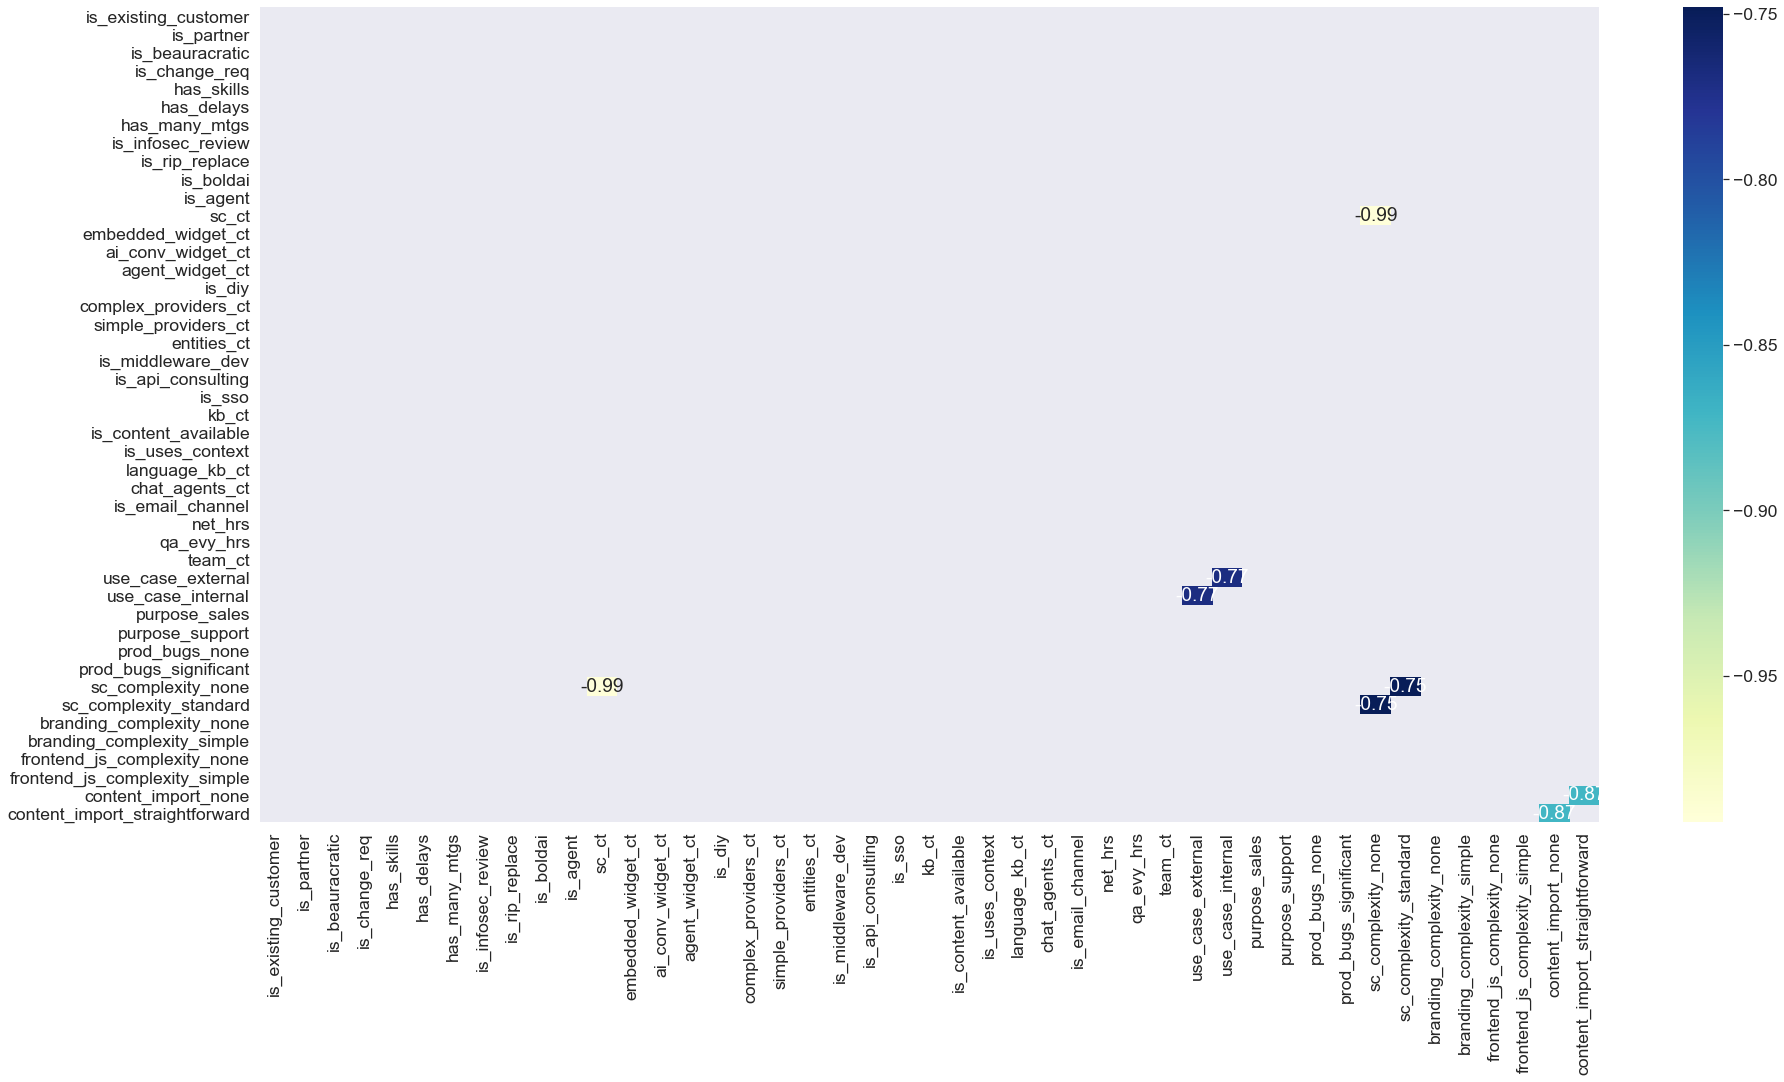

In [126]:
# Correlation heatmap
corr = data.corr('spearman')
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
ax=sns.heatmap(corr[corr<-.7],cmap="YlGnBu",annot=True) 

<Figure size 576x720 with 0 Axes>

Text(0.5, 0, 'Net hours')

Text(0, 0.5, 'Predictors')

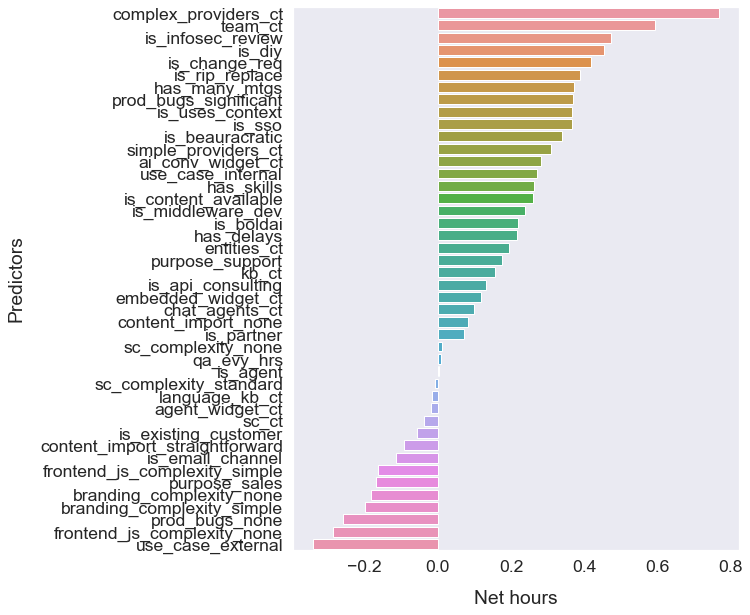

In [127]:
# Feature sorted by correlation to net horus, from positive to negative

plt.figure(figsize=(8,10))
corr = data.corr().sort_values('net_hrs', ascending=False)

ax=sns.barplot(corr.net_hrs[1:], corr.index[1:], orient='h') #barplot of correlation of variables with respect to net_hrs

ax.xaxis.grid(False) 
plt.xlabel('Net hours',labelpad=15)
plt.ylabel('Predictors',labelpad=15)
plt.show()

## Revisit Variables

**RISK**: Are any of these dropped variables sparse such that even though there is an impact on net_hours, due to sparsity the correlation is not appearing??

In [128]:
# #every partner is beauracratic as well, let's combine the columns
# data['import_straight_none'] = data.apply(lambda row: (row.content_import_straightforward+row.content_import_none)/2, axis=1).astype(int)
# data = data.drop(['content_import_straightforward','content_import_none'],axis=1)

In [129]:
# #every partner is beauracratic as well, let's combine the columns
# data['import_availabe_none'] = data.apply(lambda row: row.content_import_none or row.is_content_available, axis=1).astype(int)
# data = data.drop(['content_import_none','is_content_available'],axis=1)

**Interprebility for combined variable below is weird, maybe go with 'or' instead of 'and' at the risk of droping adj R2 a bit**

In [130]:
#These are inversely correlated, let's combine them
data['import_none_and_content_available'] = data.apply(lambda row: row.content_import_none and row.is_content_available, axis=1).astype(int)
data = data.drop(['content_import_none','is_content_available'],axis=1)

**Interprebility for combined variable below is weird, maybe go with 'or' instead of 'and' at the risk of droping adj R2 a bit**

In [131]:
#These are inversely correlated, let's combine them
data['branding_simple_and_none'] = data.apply(lambda row: row.branding_complexity_none or row.branding_complexity_simple, axis=1).astype(int)
data = data.drop(['branding_complexity_none','branding_complexity_simple'],axis=1)

In [132]:
#every partner is beauracratic as well, let's combine the columns
data['is_partner_beaur'] = data.apply(lambda row: row.is_partner or row.is_beauracratic, axis=1).astype(int)
data = data.drop(['is_partner','is_beauracratic'],axis=1)

In [133]:
#These are correlated, let's combine them
data['frontend_none_or_simple'] = data.apply(lambda row: row.frontend_js_complexity_none or row.frontend_js_complexity_simple, axis=1).astype(int)
data = data.drop(['frontend_js_complexity_none','frontend_js_complexity_simple'],axis=1)

In [134]:
#These are correlated, let's combine them
data['frontend_branding_none_or_simple'] = data.apply(lambda row: row.branding_simple_and_none or row.frontend_none_or_simple, axis=1).astype(int)
data = data.drop(['branding_simple_and_none','frontend_none_or_simple'],axis=1)

**Remember to account for Evy's hours manually**

In [135]:
#Remove Evy's hours from net hours
data['net_hrs'] = data['net_hrs']-data['qa_evy_hrs']
data = data.drop('qa_evy_hrs',axis=1)

In [136]:
# # These are correlated, let's combine them
data['delays_prod_bugs_significant_mtgs_cr'] = data.apply(lambda row: (row.has_delays) or (row.prod_bugs_significant) or (row.is_change_req) or (row.has_many_mtgs), axis=1).astype(int)
data = data.drop(['has_delays','prod_bugs_significant', 'is_change_req','has_many_mtgs'],axis=1)

In [137]:
#These are correlated, let's combine them
data['delays_prod_bugs_significant_mtgs_cr_partner_beaur'] = data.apply(lambda row: (row.is_partner_beaur) or (row.delays_prod_bugs_significant_mtgs_cr), axis=1).astype(int)
data = data.drop(['is_partner_beaur','delays_prod_bugs_significant_mtgs_cr'],axis=1)

In [138]:
# # The Adjusted R2 drops in the 3rd decimal but the p-value is significant apaprantely.

# #These are correlated, let's combine them
data['providers_entities'] = data.apply(lambda row: (row.simple_providers_ct)+(row.entities_ct)/2, axis=1).astype(int)
data = data.drop(['simple_providers_ct','entities_ct'],axis=1)

In [139]:
#drop variables iteratively
data = data.drop(['purpose_support','purpose_sales'],axis=1)
data = data.drop('is_boldai',axis=1) #High p-value and VIF
data = data.drop('is_agent',axis=1) #High p-value and VIF
data = data.drop('language_kb_ct',axis=1) # Highly correlated with kb count
data = data.drop('sc_complexity_none',axis=1) # High VIF, and logically doesn't make sense to have it as a predictor because it indicates the absence of a support center
data = data.drop('content_import_straightforward',axis=1) # High VIF
data = data.drop('use_case_external',axis=1) # High VIFa
data = data.drop('sc_complexity_standard',axis=1) #Highly correlated to sc_ct
data = data.drop('prod_bugs_none',axis=1) #Highly inversely correlated to prod_bugs_significant
data = data.drop('embedded_widget_ct',axis=1) #Correlated with sc_ct and generally not used much
data = data.drop('is_existing_customer',axis=1) #Useless - is not correlated to anything, including net hours. 
data = data.drop('chat_agents_ct',axis=1) #Useless - inaccurat numbers and so has chance correlations but not with net_hrs
data = data.drop('is_email_channel',axis=1) #Does not impact net hours
data = data.drop('is_diy',axis=1) #Does not impact net hours
data = data.drop('is_uses_context',axis=1) #Does not impact net hours
data = data.drop('has_skills',axis=1) #Does not impact net hours, also correlated to many variables
data = data.drop('is_infosec_review',axis=1) # High VIF
data = data.drop('is_rip_replace',axis=1) #Does not impact net hours
data = data.drop('is_api_consulting',axis=1) #Does not impact net hours
data = data.drop('use_case_internal',axis=1) #Does not impact net hours
# data = data.drop('team_ct',axis=1) #Drop in train and test R2

# data = data.drop('is_sso',axis=1) #DROP in ADJ R2
# data = data.drop('entities_ct',axis=1) #DROP in ADJ R2
# data = data.drop('simple_providers_ct',axis=1) #DROP in ADJ R2
# data = data.drop('content_import_none',axis=1) #Drop in ADJ R2 Inversely correlated with content import is_content_available
#data = data.drop('ai_widget_ct',axis=1) #DROP in ADJ R2
# data = data.drop('agent_widget_ct',axis=1) #DROP in ADJ R2
# data = data.drop('is_change_req',axis=1) #Highly correlated to has_many_mtgs - DROP in ADJ R2
# data = data.drop('has_many_mtgs',axis=1) #Highly correlated to is_change_req - DROP in ADJ R2
# data = data.drop('is_content_available',axis=1) #High VIF - DROP in ADJ R2
# data = data.drop('has_delays',axis=1) - Drop in Adj R2
# data = data.drop('is_content_available',axis=1) # High VIF - DROP IN ADJ R2
# data = data.drop('content_import_none',axis=1) #Same reason as sc_complexity_none  CAUSES DROP IN ADJUSTED R2
# data = data.drop('team_ct',axis=1) # High VIF - CAUSES DROP IN ADJUSTED R2

>**Observation**:
Team Count has high VIF, correlated to ai_conv_widget_ct, complex_providers_ct, kb_ct and net_hrs. This means that a project with more complexity tens to require a larger team. 

## Train-test split

In [140]:
#80-20 split
data_train,data_test = train_test_split(data,test_size=0.2,random_state=100)

In [141]:
data_train.shape
data_test.shape

(50, 13)

(13, 13)

In [142]:
#get x-y from train dataset
y_train = data_train.pop('net_hrs')
X_train = data_train

#get x-y from test dataset
y_test = data_test.pop('net_hrs')
X_test = data_test

In [143]:
X_test.columns

Index(['sc_ct', 'ai_conv_widget_ct', 'agent_widget_ct', 'complex_providers_ct',
       'is_middleware_dev', 'is_sso', 'kb_ct', 'team_ct',
       'import_none_and_content_available', 'frontend_branding_none_or_simple',
       'delays_prod_bugs_significant_mtgs_cr_partner_beaur',
       'providers_entities'],
      dtype='object')

In [144]:
#Append BMI data to test
X_test= X_test.append(pd.DataFrame([[0, 1, 1, 2, 0, 0, 1, 3, 0, 0, 1, 6]], columns=X_test.columns))
y_test=y_test.append(pd.Series([177]))

## Rescale variables

Let's scale for interpretability. 

In [145]:
#instantiate scaler object
scaler = MinMaxScaler()

In [146]:
#Save the original non scaled data for later use, if needed
X_train_notscaled = X_train
X_test_notscaled = X_test

In [147]:
# X_train.info()

In [148]:
#fit and scale train variables
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=data_train.columns) #convert to df

#export fitted scaler as a pickle file
joblib.dump(scaler, '../models/scaler.pkl')

#scale test variables
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=data_test.columns) #convert to pdf


['../models/scaler.pkl']

In [149]:
#Outcome
X_train.describe()
X_test.describe()

,sc_ct,ai_conv_widget_ct,agent_widget_ct,complex_providers_ct,is_middleware_dev,is_sso,kb_ct,team_ct,import_none_and_content_available,frontend_branding_none_or_simple,delays_prod_bugs_significant_mtgs_cr_partner_beaur,providers_entities
count,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000
mean,0.1300,0.1175,0.0986,0.0743,0.1200,0.1800,0.1000,0.4067,0.0400,0.6800,0.7200,0.0260
std,0.2823,0.1503,0.1560,0.2046,0.3283,0.3881,0.1493,0.2263,0.1979,0.4712,0.4536,0.1412
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0714,0.0000,0.0000,0.0000,0.0714,0.3333,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.1250,0.0714,0.0000,0.0000,0.0000,0.0714,0.3333,0.0000,1.0000,1.0000,0.0000
75%,0.0000,0.1250,0.0714,0.0000,0.0000,0.0000,0.0714,0.6667,0.0000,1.0000,1.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,sc_ct,ai_conv_widget_ct,agent_widget_ct,complex_providers_ct,is_middleware_dev,is_sso,kb_ct,team_ct,import_none_and_content_available,frontend_branding_none_or_simple,delays_prod_bugs_significant_mtgs_cr_partner_beaur,providers_entities
count,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000,14.0000
mean,0.1786,0.1339,0.0663,0.1837,0.1429,0.2143,0.0867,0.4524,0.1429,0.7857,0.7143,0.0393
std,0.4209,0.1426,0.0712,0.3428,0.3631,0.4258,0.0751,0.2483,0.3631,0.4258,0.4688,0.0801
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0312,0.0000,0.0000,0.0000,0.0000,0.0714,0.3333,0.0000,1.0000,0.2500,0.0000
50%,0.0000,0.1250,0.0714,0.0000,0.0000,0.0000,0.0714,0.3333,0.0000,1.0000,1.0000,0.0000
75%,0.0000,0.1250,0.0714,0.2500,0.0000,0.0000,0.0714,0.6667,0.0000,1.0000,1.0000,0.0250
max,1.5000,0.5000,0.2143,1.1429,1.0000,1.0000,0.2857,1.0000,1.0000,1.0000,1.0000,0.2750


# Modelling 

## Baseline model

In [150]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
#predict on training data set
ytrain_pred1 = model1.predict(X_train)

In [152]:
#Add constant 
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,sc_ct,ai_conv_widget_ct,agent_widget_ct,complex_providers_ct,is_middleware_dev,is_sso,kb_ct,team_ct,import_none_and_content_available,frontend_branding_none_or_simple,delays_prod_bugs_significant_mtgs_cr_partner_beaur,providers_entities
0,1.0000,0.0000,0.1250,0.0714,0.0000,0.0000,0.0000,0.0714,0.3333,0.0000,1.0000,1.0000,0.0000
1,1.0000,1.0000,0.2500,0.0000,0.0000,0.0000,1.0000,0.2857,0.6667,0.0000,0.0000,1.0000,0.0250
2,1.0000,0.0000,0.0000,0.0714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,1.0000,0.0000,0.1250,0.0714,0.0000,1.0000,0.0000,0.0714,0.0000,0.0000,1.0000,1.0000,0.0000
4,1.0000,0.0000,0.1250,0.0714,0.0000,0.0000,0.0000,0.0714,0.6667,0.0000,1.0000,1.0000,0.0000


In [153]:
#Fit LR model on trainin data set
model_1 = sm.OLS(list(y_train),X_train_const).fit()

#Get regression model stats
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     41.10
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.09e-17
Time:                        14:55:42   Log-Likelihood:                -236.56
No. Observations:                  50   AIC:                             499.1
Df Residuals:                      37   BIC:                             524.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Variables dropped:
1. None dropped: Adj R2 = 0.392
2. is_boldai: Adj R2 = 0.477
3. is_agent: Adj R2 = 0.551
4. language_kb_ct: Adj R2 = 0.597
5. purpose_sales & purpose_support: Adj R2 = 0.655
6. sc_complexity_none: Adj R2 = 0.666
7. content_import_straightforward: Adj R2 = 0.694
8. use_case_external: Adj R2 = 0.709
9. is_partner & is_beauracratic: Adj R2 = 0.729 - Combined these variables
10. sc_complexity_standard: Adj R2 = 0.741
11. prod_bugs_none: Adj R2 = 0.758
12. branding_complexity_none: Adj R2 = 0.770
13. embedded_widget_ct: Adj R2 = 0.777
14. is_existing_customer: Adj R2 = 0.779
15. chat_agents_ct: Adj R2 = 0.787
16. is_email_channel: Adj R2 = 0.797
17. branding_complexity_none & branding_complexity_none: Adj R2 = 0.806 - Combined these variables
18. is_diy: Adj R2 = 0.812
19. content_import_none & is_content_available: Adj R2 = 0.906 - Combined these variables
20. is_use_context: Adj R2 = 0.909
21. has_skills: Adj R2 = 0.909
22. is_infosec_review: Adj R2 = 0.912
23. is_rip_replace: Adj R2 = 0.912
24. is_api_consulting: Adj R2 = 0.916
24. is_use_case_internal: Adj R2 = 0.918
25. front_end_complexity_none & front_end_complexity_simple: Adj R2 = 0.919 - Combined these variables
26. qa_evy_hrs: Adj R2 = 0.914 - Deducted this from net_hrs, caused drop in Adj R2 but this is a necessary adjustment
27. branding_simple_and_none & row.frontend_none_or_simple: Adj = 0.926 - Combined these variabls
28. simple_providers_ct & entities_ct: Adj R2 = 0.916 - Combined these variables
29. has_delays, is_change_req,prod_..... Adj R2 = 0.912 - Combined these variables

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #Round off VIF to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sort ascending
vif

,Features,VIF
7,team_ct,5.5600
6,kb_ct,3.9100
10,delays_prod_bugs_significant_mtgs_cr_partner_b...,3.5700
9,frontend_branding_none_or_simple,3.0800
8,import_none_and_content_available,2.4300
1,ai_conv_widget_ct,2.2100
3,complex_providers_ct,2.0700
2,agent_widget_ct,1.7600
0,sc_ct,1.6700
5,is_sso,1.5100


<Figure size 2160x1080 with 0 Axes>

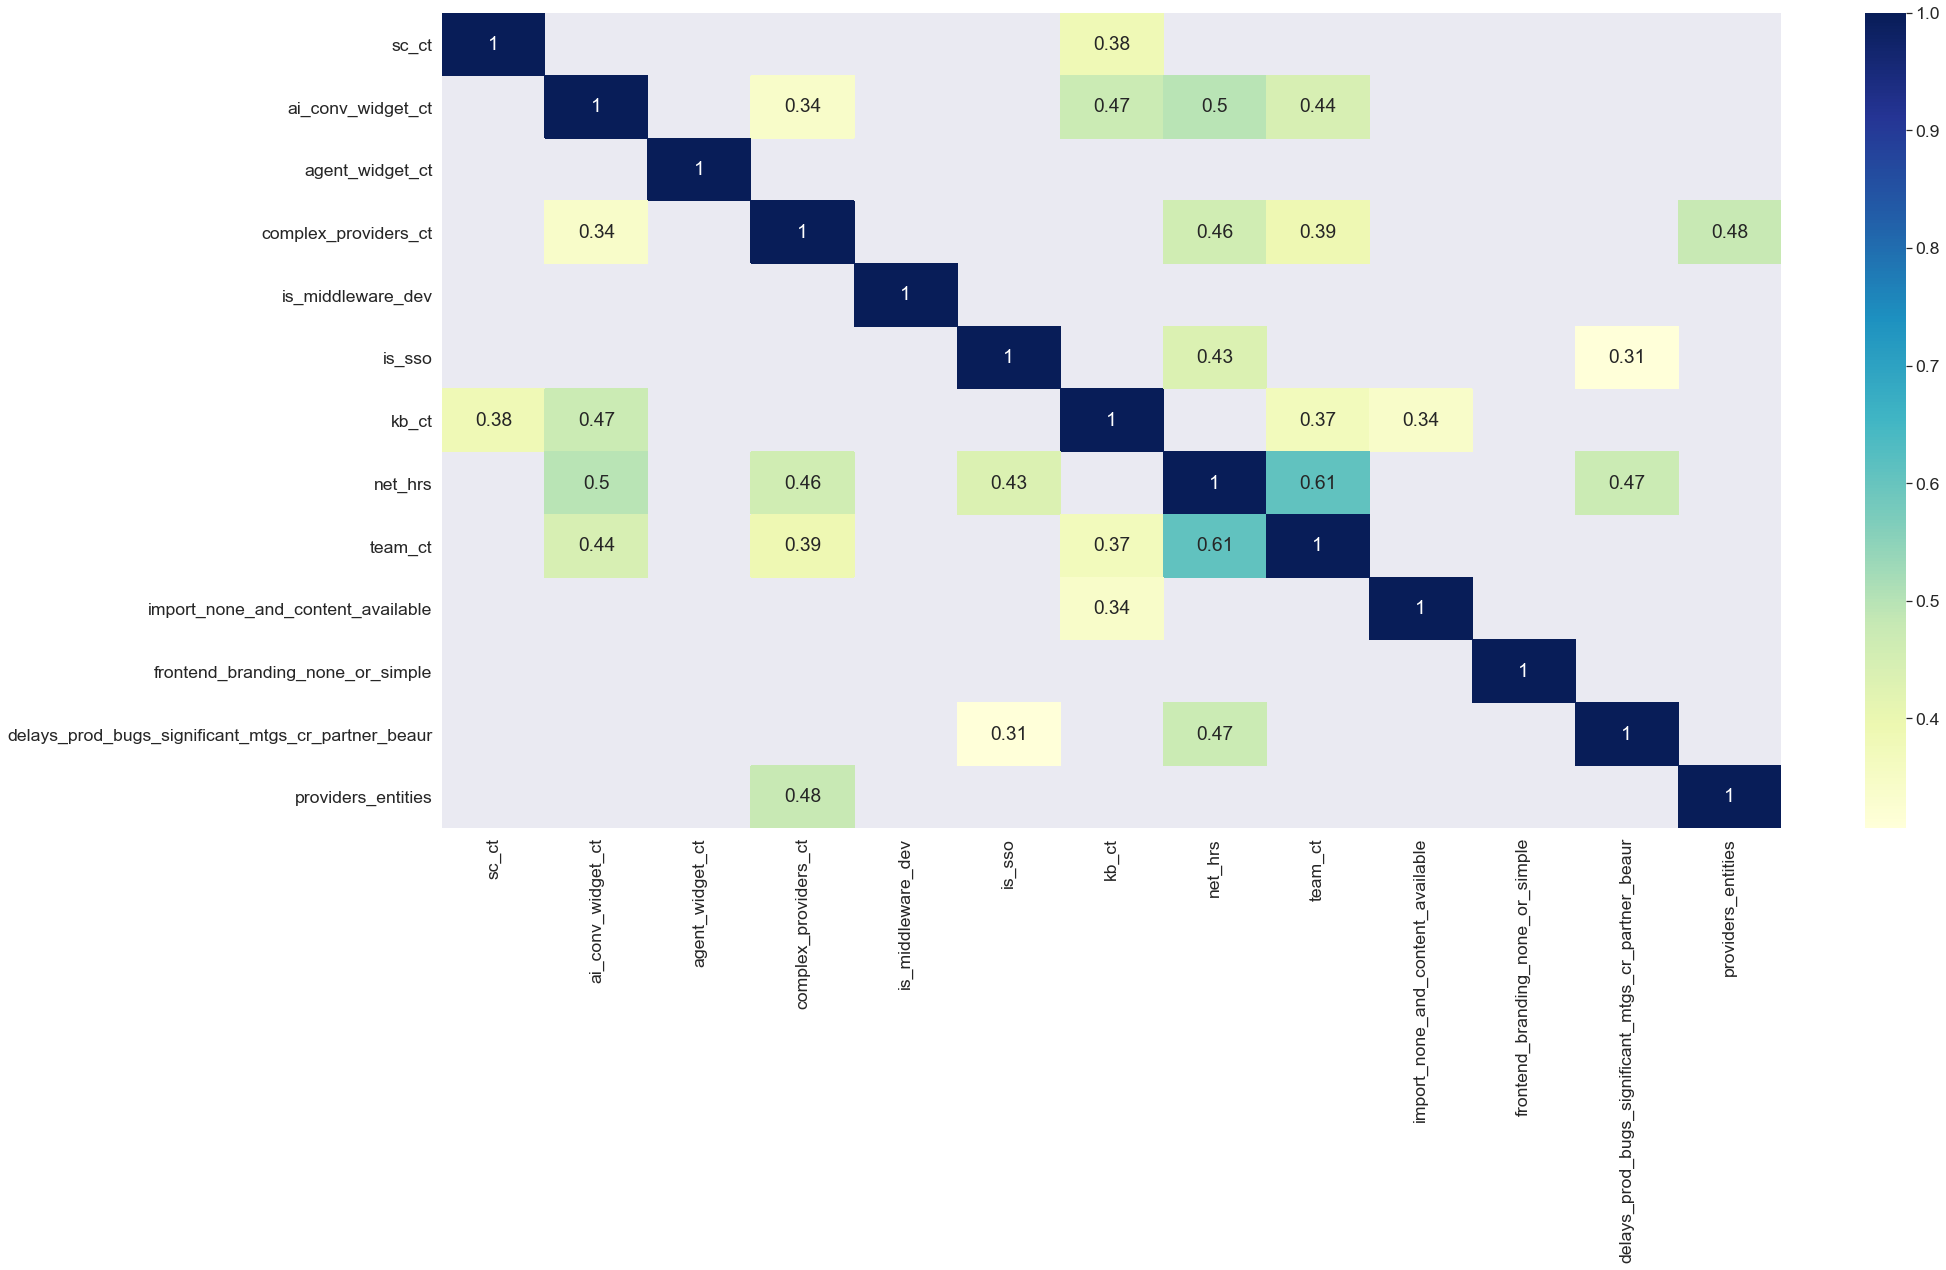

In [155]:
# Correlation heatmap
corr = data.corr('spearman')
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
ax=sns.heatmap(corr[corr>0.3],cmap="YlGnBu",annot=True) 

Text(0.5, 0.98, 'Actual vs Predicted Train Data')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Net Hours')

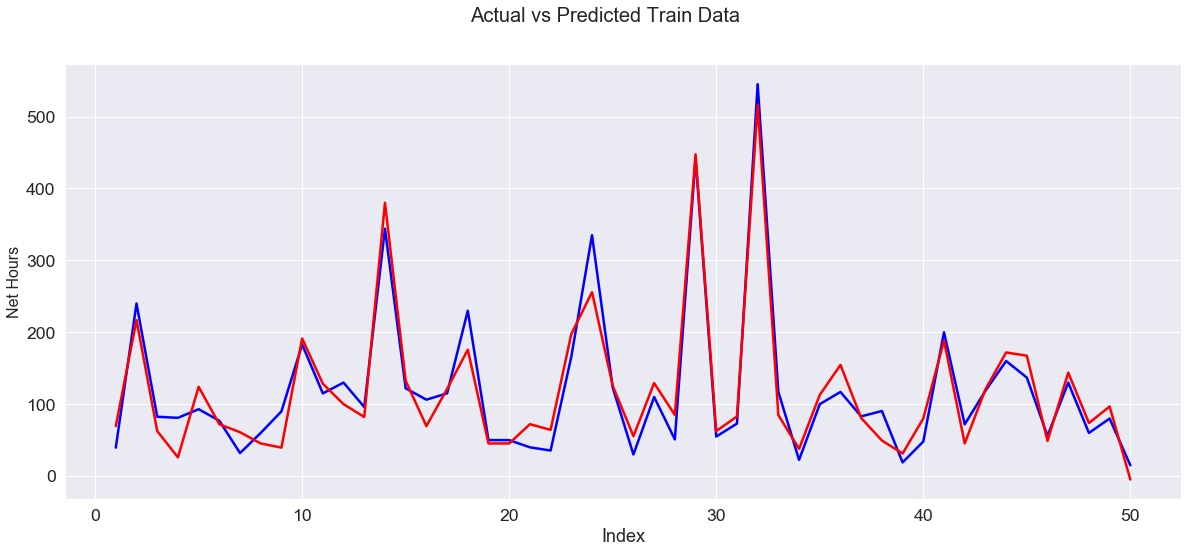

In [156]:
#Let's visualize Actual vs Predicted for Test Data
c = [i for i in range(1,y_train.shape[0]+1,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,ytrain_pred1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted Train Data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Net Hours', fontsize=16)                               # Y-label

In [157]:
# Drop variables from X_test which are not in X_train
X_test = X_test[X_train.columns]

# Add constant variable 
X_test_const = sm.add_constant(X_test)

In [158]:
#predict on test data set
ytest_pred1 = model1.predict(X_test)

In [159]:
# # Plotting y_test and y_pred to understand the spread
# fig = plt.figure()
# plt.scatter(y_test, ytest_pred1)
# fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
# plt.xlabel('y_test', fontsize = 18)                          # X-label
# plt.ylabel('y_pred', fontsize = 16)      

Text(0.5, 0.98, 'Actual vs Predicted Test Data')

Text(0.5, 0, 'Project Number')

Text(0, 0.5, 'Budget')

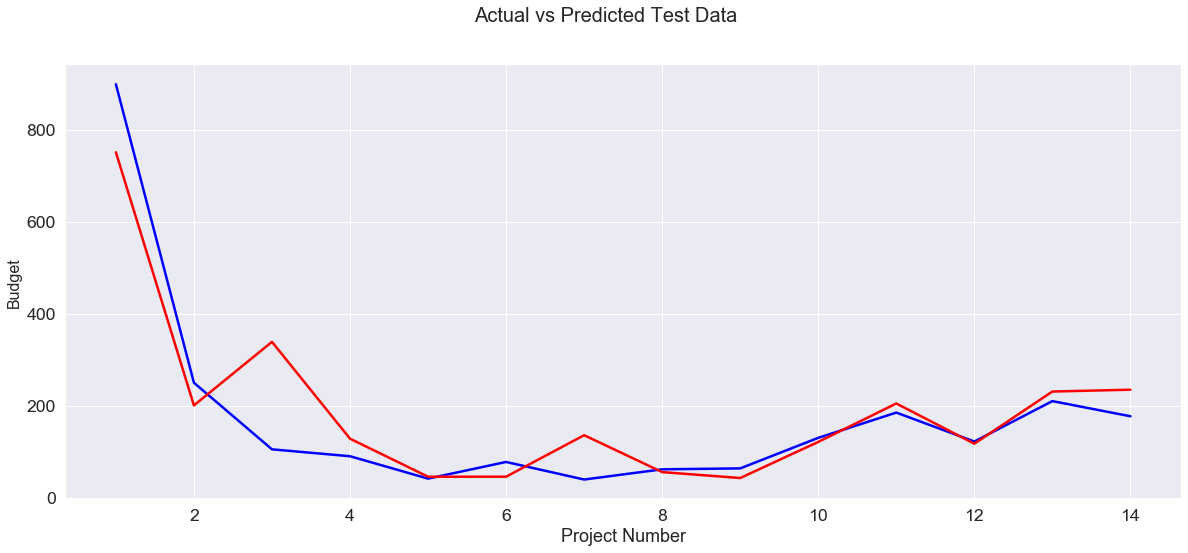

In [160]:
#Let's visualize Actual vs Predicted for Test Data
c = [i for i in range(1,y_test.shape[0]+1,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,ytest_pred1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted Test Data', fontsize=20)              # Plot heading 
plt.xlabel('Project Number', fontsize=18)                               # X-label
plt.ylabel('Budget', fontsize=16)                               # Y-label

In [161]:
#Let's get the r-square for test data
metrics.r2_score(y_test, ytest_pred1)

0.8457884722058525

In [162]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ytest_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ytest_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ytest_pred1)))

Mean Absolute Error: 52.97204306621888
Mean Squared Error: 6836.809349163057
Root Mean Squared Error: 82.68500075081971


- Mean Absolute Error: 65.1605481573152
- Mean Squared Error: 7149.488867256452
- Root Mean Squared Error: 84.55465018114883

In [163]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': ytrain_pred1})
df['diff'] = df.Predicted.astype(int)-df.Actual.astype(int)
df

,Actual,Predicted,diff
project_name,,,
"na - jenny craig, chatbot deployment, 80 hrs",39.5000,69.4882,30
fannie mae - 240 hour bucket ($60k) - sept 2019 thru aug 2020,240.0000,216.9448,-24
jan19 - florida power & light / boldchat / express (30 hours),82.5000,62.6234,-20
oct 18 bitdefender/bold360ai/deployment/50hrs/kaouidef,81.0000,26.0257,-55
oct19 - mercury - faq/support/conversational,93.0000,124.1080,31
apr20 albatros/bold360ai/deployment/40hrs/kaouidef,77.0000,72.1530,-5
axa/bold360 agent/layered windows & invitation,32.0000,60.9726,28
"middlesex bank - bot and agent with email ticketing (95 hrs @ $300/hr = $28,500)",60.0000,45.3729,-15
jun 19 - direct energy - 3phaseddeployment,90.0000,39.5701,-51


In [164]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': ytest_pred1})
df['diff'] = df.Predicted.astype(int)-df.Actual.astype(int)
df

,Actual,Predicted,diff
blueshield - bot & agent with snow integration,900.0000,751.8442,-149
liberty tax - bold360ai & support center (150 hours),250.0000,200.6195,-50
nov19 discount/bold360ai/supportcentres/105hrs/mshriki,105.0000,339.0010,234
[1593214] liberty safe - bold360ai (100 hours),90.0000,128.2032,38
[1593271] state of iowa - bold360ai (80 hours),41.2500,45.3729,4
may20 pokerstars/bold360ai/deployment/70hrs/mscala,77.5000,45.3729,-32
dec 2018 - lvs,39.2500,135.7586,96
jan20 wiprocare/bold360-rescue/50hrs/mkesari_jkartheek,61.5000,55.4647,-6
jul19 l&g/bold360ai/supportcentres/40hrs/mshriki,63.5000,42.5323,-21
city of mesa - conversational bot with escalation to live agent,130.0000,121.1375,-9


## Save Model

In [165]:
#save as a pickle file
joblib.dump(model1, '../models/estimator1.pkl')

['../models/estimator1.pkl']

To Do
- Separate out the model from 

To Do
- Identify collinearity from corr matrix and then VIF. Either drop or combine variables (average them or use OR logic) 
- Figure out how interaction terms and powers of variables can be added and check their p-values. Also, draw graph of test data error/RSE against the various powers to see which one minimizes erro
- Consider using PCA
- Check if relationship is linear by creating residual plot; no pattern means relationship is linear. 
- Calculate error % per variable using RSE (see pg 103). Also calculate confidence interval of prediction (see page 103 points 4 & 5)
- Try k-fold cross validation and maybe bootstrapping
- I have to regularize the model because the high dimensionality will lead to high variance / overfitting so I need to simplify my model by using Ridge/Lasso. Also remember that adjusted-R2 *may* not be accurate because of p~n. 

<a id="6"></a>
# References

- Estimation techniques - https://www.simplilearn.com/project-estimation-techniques-article#:~:text=While%20accurate%20estimates%20are%20the,Analysis%2C%20Reserve%20Analysis%2C%20Bottom%2D
- Parametrics estimation - https://dazeinfo.com/2019/10/08/mobile-data-usage-in-india-by-year-graphfarm/
- Top down vs bottom up approach - https://www.liquidplanner.com/blog/how-long-is-that-going-to-take-top-down-vs-bottom-up-strategies/
- Project estimation methods - https://www.liquidplanner.com/blog/5-methods-of-project-estimation/
- 3-point estimate & PERT (read the risk based explanation, it's fantastic) - https://www.projectengineer.net/three-point-estimating-for-the-pmp-exam/
- Parametric Estimating - https://www.dau.edu/tools/Lists/DAUTools/Attachments/264/Parametric%20Estimating_Linear%20Regression.pdf